In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from pathlib import Path as path

In [3]:

mypath = "/home/yasmine/Desktop/face_mask/Data/train_data/"

In [4]:
data = ImageDataBunch.from_folder(mypath, valid_pct = 0.2, size=224,ds_tfms=get_transforms()).normalize(imagenet_stats)

In [5]:

learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/yasmine/.local/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.005396,0.035675,0.000000,00:05
1,0.011570,0.018959,0.000000,00:05
2,0.010976,0.012689,0.000000,00:05
3,0.026951,0.008811,0.000000,00:04


In [19]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

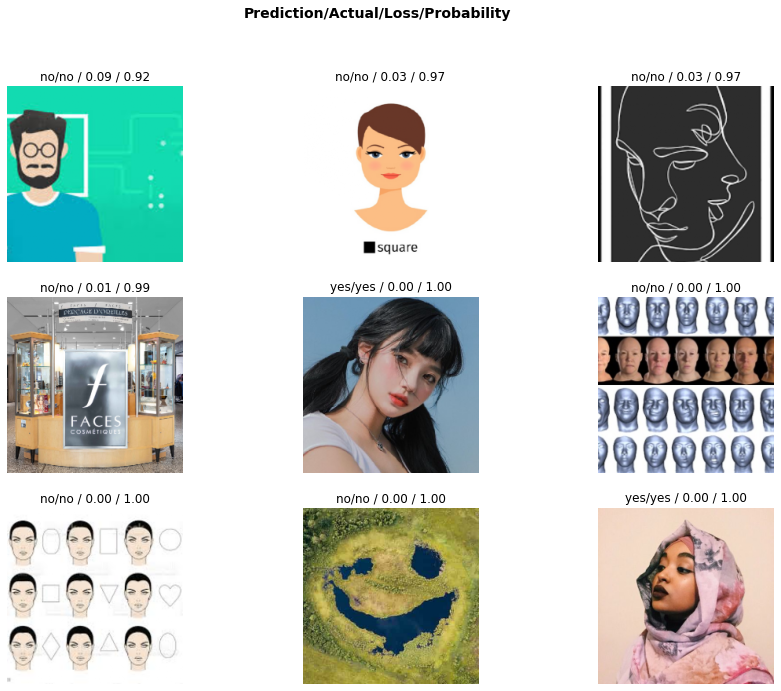

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

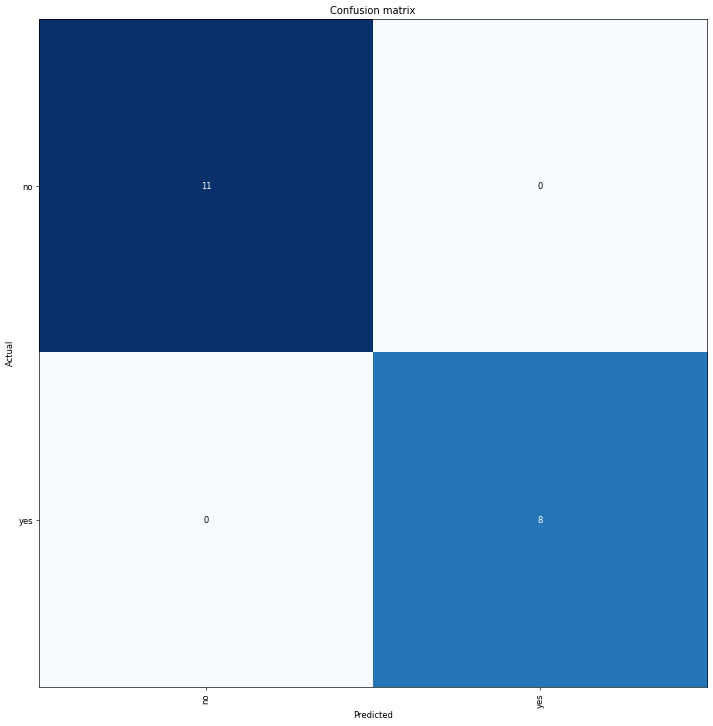

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
learn.save("/home/yasmine/Desktop/face_mask/models/first_model")